Importamos librerias

In [ ]:
!pip install feature-engine

In [ ]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit,ParameterGrid
from sklearn import set_config
from sklearn.pipeline import Pipeline
from feature_engine.encoding import RareLabelEncoder, OneHotEncoder,OrdinalEncoder
from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, RandomSampleImputer
from sklearn_pandas import DataFrameMapper
from feature_engine.outliers import Winsorizer
from feature_engine.selection import DropFeatures
from feature_engine.transformation import PowerTransformer
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.base import clone
from tqdm import tqdm
from shutil import rmtree

In [ ]:
pip install scikit-plot

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, fbeta_score, f1_score,
    matthews_corrcoef, balanced_accuracy_score,
    roc_auc_score, average_precision_score, classification_report, confusion_matrix,roc_curve
)
from scikitplot.metrics import plot_roc, plot_confusion_matrix, plot_precision_recall

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

In [ ]:
import seaborn as sb

In [ ]:
import matplotlib.pyplot as plot

In [ ]:
!pip install joypy
from joypy import joyplot

In [ ]:
from tempfile import mkdtemp

In [ ]:
from pandas import crosstab

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive2 = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.options.display.max_columns = None

Importamos la base

In [ ]:
base1 = drive2.CreateFile({'id':"1_i-XMBQ15rEYq6BJAwniCvn9T5fj6mKE"})
base1.GetContentFile('credit_card_churn.csv')

In [ ]:
db=pd.read_csv("credit_card_churn.csv", sep=",")

In [ ]:
db2=db[:]

In [ ]:
db2 = db2.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

# Analisis descriptivo

In [ ]:
db.columns

In [1]:
db.info

NameError: ignored

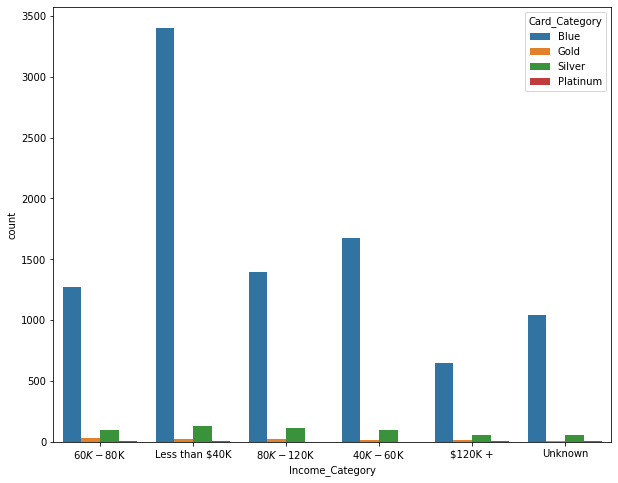

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=db2,x='Income_Category',hue='Card_Category')
#plt.title('')
plt.show()

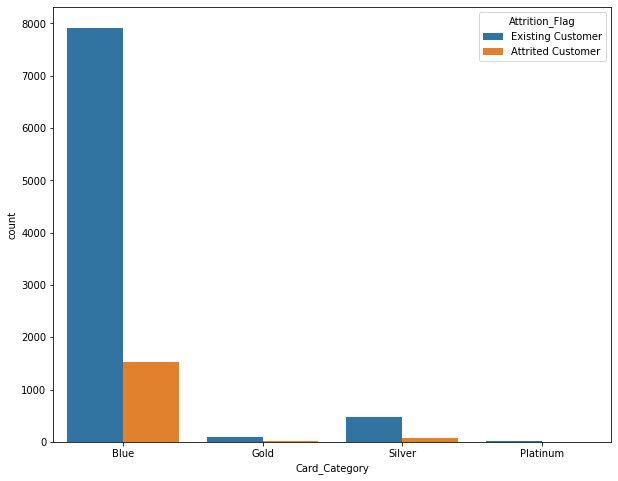

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=db2,x='Card_Category',hue='Attrition_Flag')
#plt.title('')
plt.show()

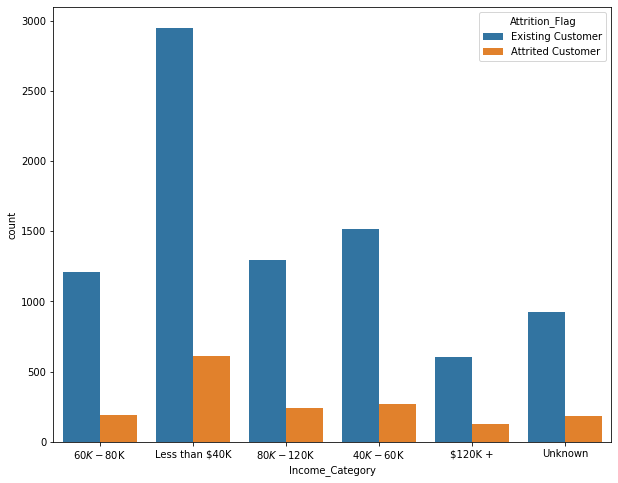

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=db2,x='Income_Category',hue='Attrition_Flag')
#plt.title('')
plt.show()

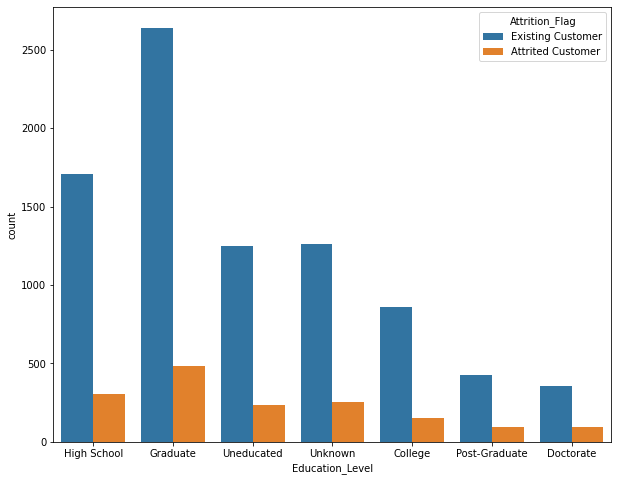

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=db2,x='Education_Level',hue='Attrition_Flag')
#plt.title('')
plt.show()

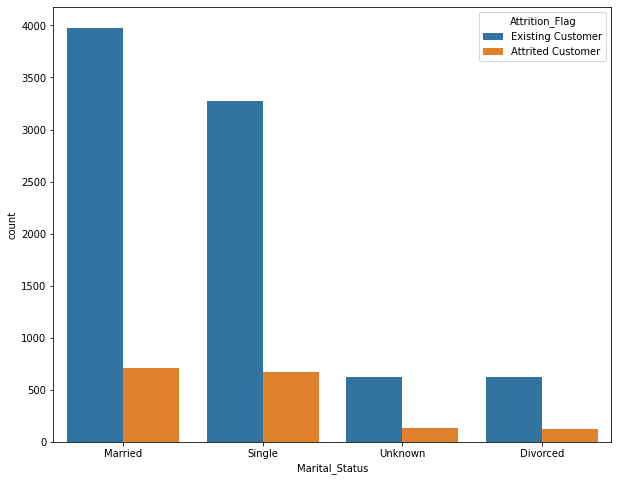

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=db2,x='Marital_Status',hue='Attrition_Flag')
#plt.title('')
plt.show()

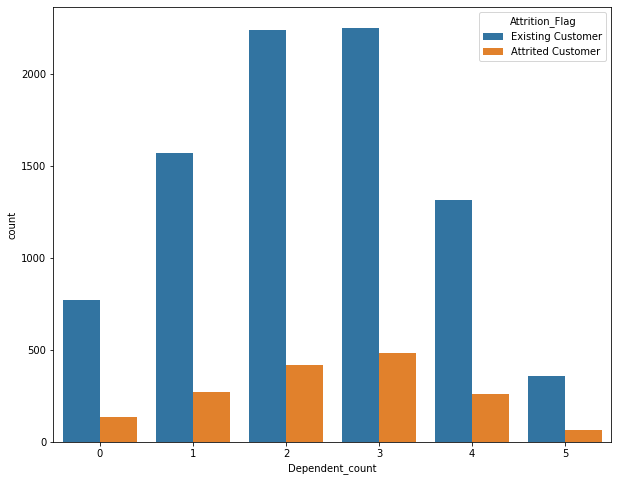

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=db2,x='Dependent_count',hue='Attrition_Flag')
#plt.title('')
plt.show()

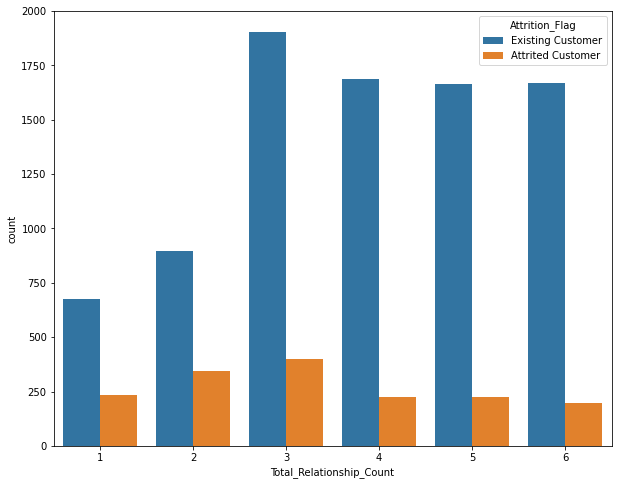

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=db2,x='Total_Relationship_Count',hue='Attrition_Flag')
#plt.title('')
plt.show()

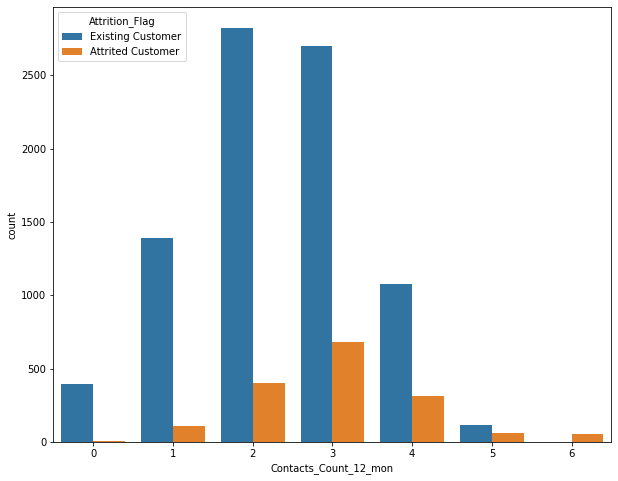

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=db2,x='Contacts_Count_12_mon',hue='Attrition_Flag')
#plt.title('')
plt.show()

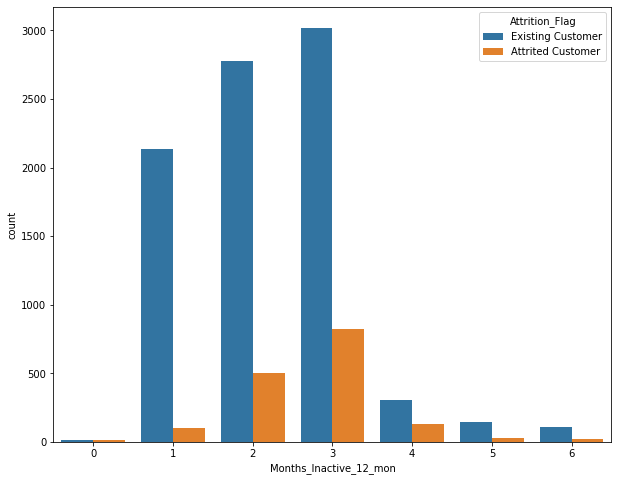

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=db2,x='Months_Inactive_12_mon',hue='Attrition_Flag')
#plt.title('')
plt.show()

In [ ]:
db.shape

(10127, 23)

In [ ]:
db.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [ ]:
a=pd.DataFrame(db.groupby(["Attrition_Flag", "Education_Level"])["CLIENTNUM"].count())
a

CLIENTNUM
Attrition_Flag    Education_Level           
Attrited Customer College                154
                  Doctorate               95
                  Graduate               487
                  High School            306
                  Post-Graduate           92
                  Uneducated             237
                  Unknown                256
Existing Customer College                859
                  Doctorate              356
                  Graduate              2641
                  High School           1707
                  Post-Graduate          424
                  Uneducated            1250
                  Unknown               1263

In [ ]:
b=pd.DataFrame(db.groupby(["Attrition_Flag", "Card_Category"])["CLIENTNUM"].count())
b

CLIENTNUM
Attrition_Flag    Card_Category           
Attrited Customer Blue                1519
                  Gold                  21
                  Platinum               5
                  Silver                82
Existing Customer Blue                7917
                  Gold                  95
                  Platinum              15
                  Silver               473

In [ ]:
pd.DataFrame(db.groupby(["Attrition_Flag", "Gender"])["CLIENTNUM"].count())

CLIENTNUM
Attrition_Flag    Gender           
Attrited Customer F             930
                  M             697
Existing Customer F            4428
                  M            4072

In [ ]:
pd.DataFrame(db.groupby(["Attrition_Flag", "Marital_Status"])["CLIENTNUM"].count())

CLIENTNUM
Attrition_Flag    Marital_Status           
Attrited Customer Divorced              121
                  Married               709
                  Single                668
                  Unknown               129
Existing Customer Divorced              627
                  Married              3978
                  Single               3275
                  Unknown               620

In [ ]:
pd.DataFrame(db.groupby(["Attrition_Flag", "Income_Category"])["CLIENTNUM"].count())

CLIENTNUM
Attrition_Flag    Income_Category           
Attrited Customer $120K +                126
                  $40K - $60K            271
                  $60K - $80K            189
                  $80K - $120K           242
                  Less than $40K         612
                  Unknown                187
Existing Customer $120K +                601
                  $40K - $60K           1519
                  $60K - $80K           1213
                  $80K - $120K          1293
                  Less than $40K        2949
                  Unknown                925

In [ ]:
pd.DataFrame(db.groupby(["Attrition_Flag", "Dependent_count"])["CLIENTNUM"].count())

CLIENTNUM
Attrition_Flag    Dependent_count           
Attrited Customer 0                      135
                  1                      269
                  2                      417
                  3                      482
                  4                      260
                  5                       64
Existing Customer 0                      769
                  1                     1569
                  2                     2238
                  3                     2250
                  4                     1314
                  5                      360

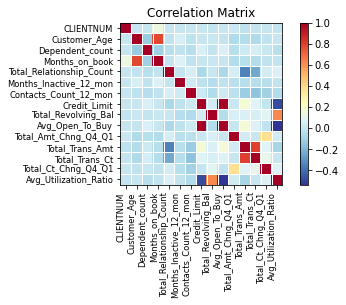

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
corr = db2.set_index('Attrition_Flag').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.xticks(rotation=90,ha='right')
plt.show()

In [ ]:
pd.crosstab(db.Dependent_count,db.Months_Inactive_12_mon)

In [ ]:
pd.crosstab(db.Gender,db.Months_Inactive_12_mon)

In [ ]:
pd.crosstab(db.Education_Level,db.Contacts_Count_12_mon)

In [ ]:
pd.crosstab(db.Education_Level,db.Card_Category,)

In [ ]:
nueva=db2.groupby(['Attrition_Flag'])
nueva.describe()

CLIENTNUM                                           \
                      count          mean           std          min   
Attrition_Flag                                                         
Attrited Customer    1627.0  7.352614e+08  3.557725e+07  708083283.0   
Existing Customer    8500.0  7.399272e+08  3.710723e+07  708082083.0   

                                                                        \
                           25%          50%           75%          max   
Attrition_Flag                                                           
Attrited Customer  712371258.0  716564433.0  7.683737e+08  828294933.0   
Existing Customer  713219658.0  718164333.0  7.783415e+08  828343083.0   

                  Customer_Age             ... Total_Ct_Chng_Q4_Q1         \
                         count       mean  ...                 75%    max   
Attrition_Flag                             ...                              
Attrited Customer       1627.0  46.659496  ...               0.692  2.500   
Existing Customer       8500.0  46.262118  ...               0.833  3.714   

                  Avg_Utilization_Ratio                                  \
                                  count      mean       std  min    25%   
Attrition_Flag                                                            
Attrited Customer                1627.0  0.162475  0.264458  0.0  0.000   
Existing Customer                8500.0  0.296412  0.272568  0.0  0.055   

                                          
                     50%      75%    max  
Attrition_Flag                            
Attrited Customer  0.000  0.23100  0.999  
Existing Customer  0.211  0.52925  0.994  

[2 rows x 120 columns]

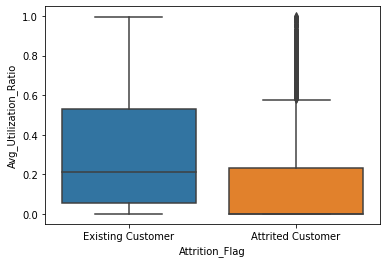

In [ ]:
sns.boxplot( x=db2["Attrition_Flag"], y=(db2["Avg_Utilization_Ratio"]))

In [ ]:
db2.columns

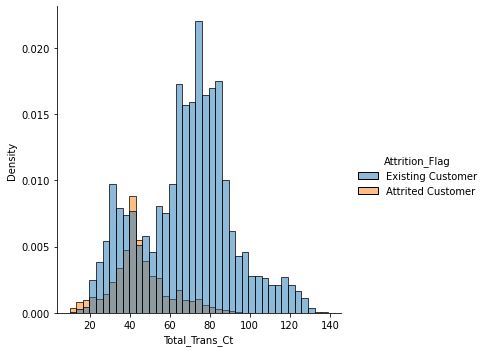

In [ ]:
sns.displot(db2, x="Total_Trans_Ct", hue="Attrition_Flag",stat="density")

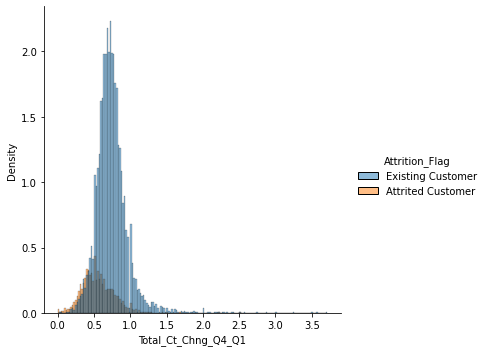

In [ ]:
sns.displot(db2, x="Total_Ct_Chng_Q4_Q1", hue="Attrition_Flag",stat="density")

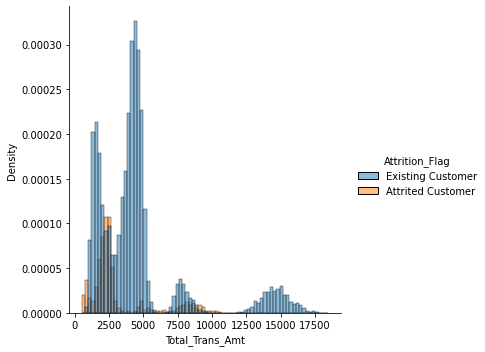

In [ ]:
sns.displot(db2, x="Total_Trans_Amt", hue="Attrition_Flag",stat="density")

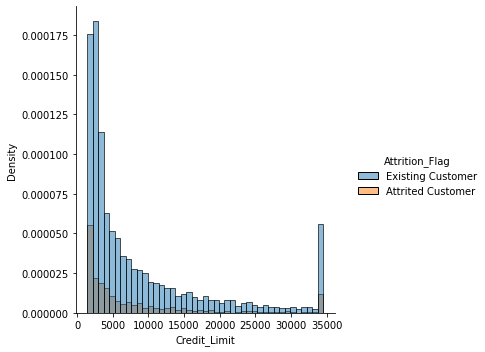

In [ ]:
sns.displot(db2, x="Credit_Limit", hue="Attrition_Flag",stat="density")

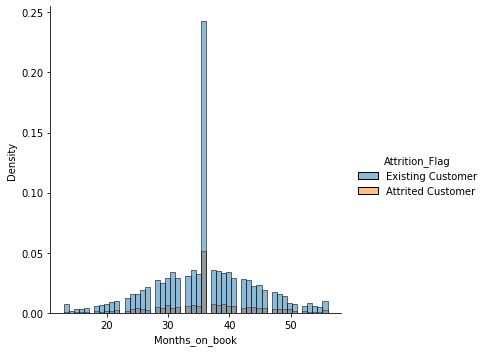

In [ ]:
sns.displot(db2, x="Months_on_book", hue="Attrition_Flag",stat="density")

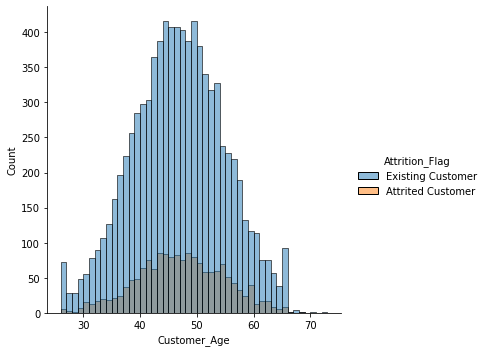

In [ ]:
sns.displot(db2, x="Customer_Age", hue="Attrition_Flag")

Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


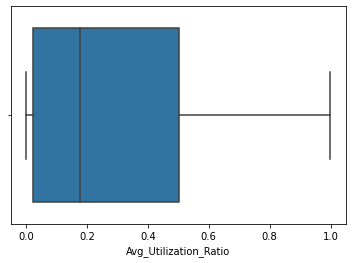

In [ ]:
sns.boxplot(db["Avg_Utilization_Ratio"])

In [ ]:
for c in categorical_features2:
    print(c)
    print(db2[c].value_counts(normalize=True, dropna=False), "\n")

Gender
F    0.529081
M    0.470919
Name: Gender, dtype: float64 

Education_Level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64 

Marital_Status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64 

Income_Category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64 

Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64 



In [ ]:
nueva['Card_Category'].value_counts().plot(kind='bar')
plt.xticks(rotation=30, ha='right')

In [ ]:
db.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Datos desbalanceados

In [ ]:
db.Attrition_Flag.value_counts()
#datos desbalanceados!

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

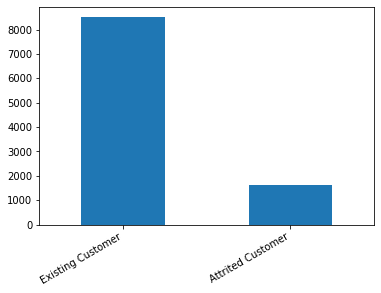

In [ ]:
db['Attrition_Flag'].value_counts().plot(kind='bar')
plt.xticks(rotation=30, ha='right')

# Particiones

In [ ]:
all_features = db.columns.tolist()
categorical_features = [c for c in all_features if db[c].dtype == 'object']
numeric_features = [c for c in all_features if db[c].dtype != 'object']


In [ ]:
categorical_features2=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numeric_features2=['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [ ]:
df_train, df_test = train_test_split(db, test_size=0.2, random_state=33)

In [ ]:
df_test.to_csv("data_test.csv", index=True)
del df_test

In [ ]:
X = df_train.drop(["Attrition_Flag"], axis=1)
y = df_train["Attrition_Flag"]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
y_train= y_train.map({'Attrited Customer':True ,'Existing Customer':False})
y_val=y_val.map({'Attrited Customer':True ,'Existing Customer':False})
y=y.map({'Attrited Customer':True ,'Existing Customer':False})

Pesos

In [ ]:
y_train.mean()

In [ ]:
y_val.mean()

In [ ]:
print(
    pd.Series(y).value_counts(normalize=True),
    pd.Series(y_train).value_counts(normalize=True),
    pd.Series(y_val).value_counts(normalize=True),
    sep="\n"
)

False    0.837921
True     0.162079
Name: Attrition_Flag, dtype: float64
False    0.837963
True     0.162037
Name: Attrition_Flag, dtype: float64
False    0.837754
True     0.162246
Name: Attrition_Flag, dtype: float64


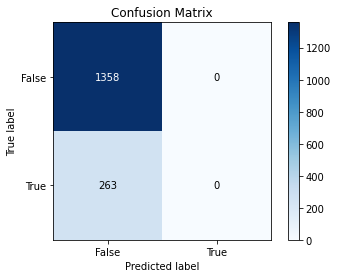

In [ ]:
y_pred0=np.zeros_like(y_val)
plot_confusion_matrix(y_val,y_pred0,normalize=False)

In [ ]:
#accuracy de predecir la clase mayoritaria
1-(263/(1358+263))

0.83775447254781

MODELOS


In [ ]:
n_samples = X_train.shape[0]
freq_classes = np.bincount(y_train)
n_classes = len(freq_classes)

print("raw frequencies:")
print(freq_classes)

ws = n_samples / (n_classes * freq_classes)
print("class weights:")
print(ws)
print(freq_classes * ws)

raw frequencies:
[5430 1050]
class weights:
[0.59668508 3.08571429]
[3240. 3240.]


#PIPE 1 Y SCORES

In [ ]:
Unknown=["Education_Level","Marital_Status","Income_Category"]

In [ ]:
def f2_score(y, y_pred, beta=2):
    return fbeta_score(y, y_pred, beta=beta)

def get_proba(clf, X):
    return clf.predict_proba(X)[:, 1]

def metrics_by_threshold(clf, X, y, metric_fn):
    thresholds = np.linspace(0, 1, 100)
    y_pred_proba = get_proba(clf, X)
    metrics = [metric_fn(y, y_pred_proba > t) for t in thresholds]
    return pd.DataFrame({"threshold": thresholds, "metric": metrics})

def plot_metric_by_threshold(clf, X, y, metric_fn):
    df_thresholds = metrics_by_threshold(clf, X, y, metric_fn)
    df_optimal = df_thresholds.loc[df_thresholds["metric"].idxmax()]
    optimal_threshold = df_optimal["threshold"]
    max_metric = df_optimal["metric"]
    # vertical bar at optimal threshold
    plt.axvline(x=optimal_threshold, color="r", linestyle="--")
    plt.axvline(x=0.5, color="gray", linestyle="--")
    plt.plot(df_thresholds["threshold"], df_thresholds["metric"])
    plt.xlim(0,1)
    # max value and optimal threshold in the title:
    plt.title(
        f"max {metric_fn.__name__}: {max_metric:.3f} threshold = {optimal_threshold:.3f}")

def print_metrics(clf, X, y, threshold=.5):
    y_pred_proba = get_proba(clf, X)
    y_pred = y_pred_proba > threshold
    print(f"### threshold = {threshold:.3f}")
    print(f"accuracy: {accuracy_score(y, y_pred):.3f}")
    print(f"f2: {f2_score(y, y_pred):.3f}")
    print(f"AUPRC: {average_precision_score(y, y_pred_proba):.3f}")

def clf_diagnostic(clf, X, y, metric_fn=f2_score):
    plot_metric_by_threshold(clf, X, y, metric_fn)
    plt.show()
    df_threshold = metrics_by_threshold(clf, X, y, metric_fn)
    threshold = df_threshold.loc[df_threshold["metric"].idxmax()]["threshold"]
    print_metrics(clf, X_val_transformed, y_val, threshold)
    print_metrics(clf, X_val_transformed, y_val, 0.5)


In [ ]:
#cachedir = mkdtemp()
pipe = Pipeline([
    ("0", DropFeatures(features_to_drop=["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])), 
    ("1", RandomSampleImputer(variables=Unknown, random_state=None, seed='general', seeding_method='add')),
    ("2", RareLabelEncoder(tol=50 / X.shape[0], n_categories=1, replace_with="Rare", variables=categorical_features2)),
    ("3", OrdinalEncoder(encoding_method='ordered', variables=categorical_features2)),
    ("4", Winsorizer(capping_method='gaussian', tail='right', fold=3, add_indicators=True, variables=numeric_features2, missing_values='ignore')),
   #('RFC', RandomForestClassifier(n_estimators=500, max_features="log2", oob_score=True,criterion="entropy",max_depth=9,class_weight="balanced"))
   #("LGBM",LGBMClassifier(is_unbalance=True, objective= "binary",max_depth=5,min_child_samples= 5, num_leaves=5))
    #("DTC",DecisionTreeClassifier(class_weight= 'balanced',criterion='gini',max_depth= 20,min_samples_leaf=5))
    #("EXT", ExtraTreesClassifier(oob_score=True,bootstrap=True,class_weight='balanced', criterion= 'entropy', max_depth=25))
],
 #memory=cachedir
)
#solo descomento el modelo correspondiente para el feature importante


In [ ]:
set_config(display="diagram")
pipe

In [ ]:
_=pipe[:6].fit(X_train, y_train)
pipe[:6].transform(X_train)

In [ ]:
X_train["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_train["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_train["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
_=pipe.fit(X_train, y_train)
X_train_transformed = pipe.transform(X_train)

In [ ]:
X_train_transformed

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_right,Dependent_count_right,Months_on_book_right,Total_Relationship_Count_right,Months_Inactive_12_mon_right,Contacts_Count_12_mon_right,Credit_Limit_right,Total_Revolving_Bal_right,Avg_Open_To_Buy_right,Total_Amt_Chng_Q4_Q1_right,Total_Trans_Amt_right,Total_Trans_Ct_right,Total_Ct_Chng_Q4_Q1_right,Avg_Utilization_Ratio_right
8951,52.0000,0,2,2,0,2,0,37,1,3.0000,1.0000,34516.0000,1369,33147.0000,0.7640,7745.0000,82,0.6400,0.0400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7232,49.0000,0,2,2,0,2,0,38,3,4.0000,3.0000,34516.0000,0,34516.0000,0.4820,1592.0000,35,0.3460,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8861,55.0000,0,3,3,2,4,0,44,2,2.0000,3.0000,6455.0000,1837,4618.0000,0.7170,8001.0000,99,0.7070,0.2850,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2112,53.0000,0,4,2,0,2,0,36,3,2.0000,2.0000,3924.0000,2517,1407.0000,0.5110,1417.0000,30,0.6670,0.6410,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4361,46.0000,1,3,1,0,3,0,38,4,2.0000,2.0000,1781.0000,1315,466.0000,0.7040,4775.0000,83,0.7290,0.7380,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,53.0000,1,3,0,2,3,0,35,6,3.0000,1.0000,9786.0000,0,9786.0000,0.7010,820.0000,25,0.5620,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6025,33.0000,1,3,2,2,3,0,36,5,2.0000,3.0000,1457.0000,0,1457.0000,0.6770,2200.0000,45,0.3640,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5572,47.0000,1,4,1,2,3,0,39,3,3.0000,4.0000,1548.0000,0,1548.0000,0.6640,4420.0000,71,0.7750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9875,42.0000,0,3,1,0,1,0,30,3,3.0000,4.0000,4333.0000,739,3594.0000,0.6900,14573.2206,100,0.7540,0.1710,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000


##LGBM CLASSIFIER

In [ ]:
param_gridLGBM ={'LGBM__num_leaves': [5,10,20],
             'LGBM__min_child_samples': [5,10,15], 
             'LGBM__max_depth': [5,10,20],
             }

In [ ]:
LGBMA=LGBMClassifier(is_unbalance=True,objective= "binary")

In [ ]:
gridsearch1=GridSearchCV(LGBMA,param_gridLGBM)

In [ ]:
gridsearch1.fit(X_train_transformed,y_train)

GridSearchCV(estimator=LGBMClassifier(is_unbalance=True, objective='binary'),
             param_grid={'LGBM__max_depth': [5, 10, 20],
                         'LGBM__min_child_samples': [5, 10, 15],
                         'LGBM__num_leaves': [5, 10, 20]})

In [ ]:
gridsearch1.best_params_

{'LGBM__max_depth': 5, 'LGBM__min_child_samples': 5, 'LGBM__num_leaves': 5}

In [ ]:
modelo1=LGBMClassifier(is_unbalance=True, objective= "binary",max_depth=5,min_child_samples= 5, num_leaves=5)

In [ ]:
_=modelo1.fit(X_train_transformed,y_train)

In [ ]:
X_val["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
X_val_transformed = pipe.transform(X_val)

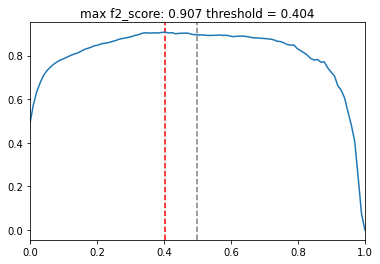

### threshold = 0.404
accuracy: 0.930
f2: 0.907
AUPRC: 0.954
### threshold = 0.500
accuracy: 0.941
f2: 0.894
AUPRC: 0.954


In [ ]:
clf_diagnostic(modelo1, X_val_transformed, y_val) 

In [ ]:
y_val_pred_proba = modelo1.predict_proba(X_val_transformed)[:, 1]
y_val_pred = y_val_pred_proba > 0.404

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
p=tp / (tp + fp)
r=tp / (tp + fn)
print(f"precision = {tp / (tp + fp):.4f}")
print(f"recall = {tp / (tp + fn):.4f}")
print(f"f1 = {2*((p*r)/ (p+r)):.4f}")

precision = 0.7060
recall = 0.9772
f1 = 0.8198


In [ ]:
print(classification_report(y_val, y_val_pred, labels=gridsearch1.classes_))

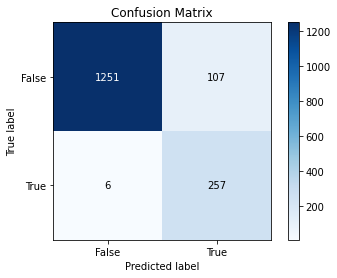

In [ ]:
plot_confusion_matrix(y_val, y_val_pred, normalize=False)

In [ ]:
print(f"AUPRC: {average_precision_score(y_val, y_val_pred_proba):.3f}")

AUPRC: 0.954


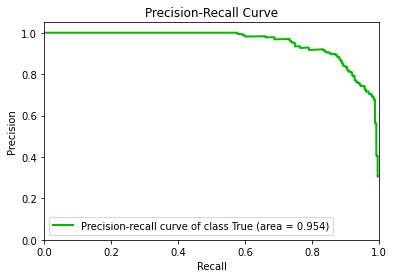

In [ ]:
y_pred_ = modelo1.predict_proba(X_val_transformed)
plot_precision_recall(y_val, y_pred_, classes_to_plot=[1], plot_micro=False,)
plt.show()

#DT CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parameters={
    'max_depth': [2, 5, 20],
    'min_samples_leaf': [5, 10, 20, 100],
    'criterion': ["gini", "entropy"],
    "class_weight":["balanced"]
}

In [ ]:
class3=DecisionTreeClassifier()

In [ ]:
search3=GridSearchCV(class3,parameters)

In [ ]:
search3.fit(X_train_transformed,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 20],
                         'min_samples_leaf': [5, 10, 20, 100]})

In [ ]:
search3.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 5}

In [ ]:
modelo3 = DecisionTreeClassifier(class_weight= 'balanced',criterion='gini',max_depth= 20,min_samples_leaf=5)

In [ ]:
_=modelo3.fit(X_train_transformed,y_train)

In [ ]:
X_val["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
X_val_transformed = pipe.transform(X_val)

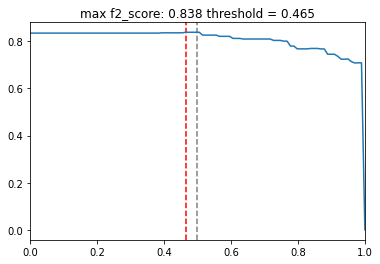

### threshold = 0.465
accuracy: 0.924
f2: 0.838
AUPRC: 0.785
### threshold = 0.500
accuracy: 0.924
f2: 0.838
AUPRC: 0.785


In [ ]:
clf_diagnostic(modelo3, X_val_transformed, y_val) 

In [ ]:
y_val_pred_proba = modelo3.predict_proba(X_val_transformed)[:, 1]
y_val_pred = y_val_pred_proba > 0.465

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
p=tp / (tp + fp)
r=tp / (tp + fn)
print(f"precision = {tp / (tp + fp):.4f}")
print(f"recall = {tp / (tp + fn):.4f}")
print(f"f1 = {2*((p*r)/ (p+r)):.4f}")

precision = 0.7165
recall = 0.8745
f1 = 0.7877


In [ ]:
print(classification_report(y_val, y_val_pred, labels=search3.classes_))

              precision    recall  f1-score   support

       False       0.97      0.93      0.95      1358
        True       0.72      0.87      0.79       263

    accuracy                           0.92      1621
   macro avg       0.85      0.90      0.87      1621
weighted avg       0.93      0.92      0.93      1621



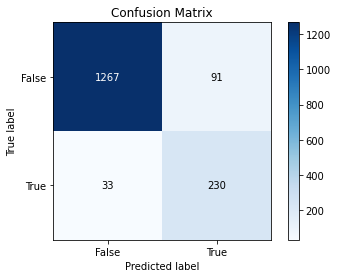

In [ ]:
plot_confusion_matrix(y_val, y_val_pred, normalize=False)

In [ ]:
print(f"AUPRC: {average_precision_score(y_val, y_val_pred_proba):.3f}")

AUPRC: 0.785


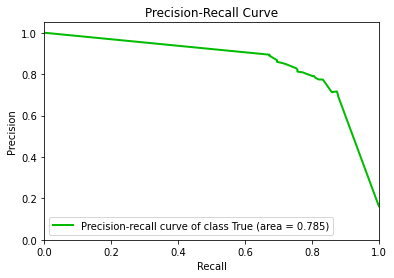

In [ ]:
y_pred_ = modelo3.predict_proba(X_val_transformed)
plot_precision_recall(y_val, y_pred_, classes_to_plot=[1], plot_micro=False,)
plt.show()

#EXT CLASSIFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
parameters = {
    "EXT__class_weight":["balanced"],
    'EXT__max_depth':[25, 40, 2],
    'EXT__criterion' : ["gini", "entropy"]
       }
       #EXT__

In [ ]:
EX=ExtraTreesClassifier(oob_score=True,bootstrap=True)

In [ ]:
gridsearch4=GridSearchCV(EX,parameters)

In [ ]:
gridsearch4.fit(X_train_transformed,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(bootstrap=True, oob_score=True),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 40, 2]})

In [ ]:
gridsearch4.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 25}

In [ ]:
modelo4 = ExtraTreesClassifier(oob_score=True,bootstrap=True,class_weight='balanced', criterion= 'entropy', max_depth=25)

In [ ]:
_=modelo4.fit(X_train_transformed,y_train)

In [ ]:
X_val["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
X_val_transformed = pipe.transform(X_val)

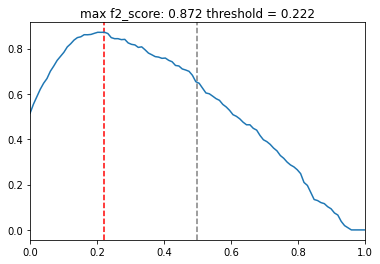

### threshold = 0.222
accuracy: 0.927
f2: 0.872
AUPRC: 0.905
### threshold = 0.500
accuracy: 0.930
f2: 0.654
AUPRC: 0.905


In [ ]:
clf_diagnostic(modelo4, X_val_transformed, y_val) 

In [ ]:
y_val_pred_proba = modelo4.predict_proba(X_val_transformed)[:, 1]
y_val_pred = y_val_pred_proba > 0.222

In [ ]:
print(classification_report(y_val, y_val_pred, labels=gridsearch4.classes_))

              precision    recall  f1-score   support

       False       0.98      0.93      0.96      1358
        True       0.71      0.92      0.80       263

    accuracy                           0.93      1621
   macro avg       0.85      0.93      0.88      1621
weighted avg       0.94      0.93      0.93      1621



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
p=tp / (tp + fp)
r=tp / (tp + fn)
print(f"precision = {tp / (tp + fp):.4f}")
print(f"recall = {tp / (tp + fn):.4f}")
print(f"f1 = {2*((p*r)/ (p+r)):.4f}")

precision = 0.7126
recall = 0.9240
f1 = 0.8046


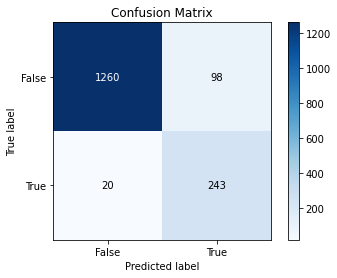

In [ ]:
plot_confusion_matrix(y_val, y_val_pred, normalize=False)

In [ ]:
print(f"AUPRC: {average_precision_score(y_val, y_val_pred_proba):.3f}")

AUPRC: 0.905


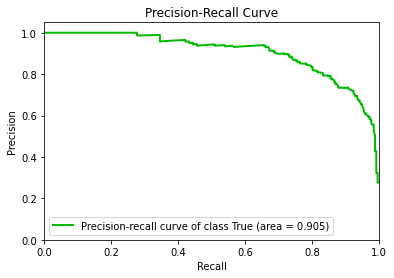

In [ ]:
y_pred_ = modelo4.predict_proba(X_val_transformed)
plot_precision_recall(y_val, y_pred_, classes_to_plot=[1], plot_micro=False,)
plt.show()

los "EXT__" los agregue a los parametros cuando debia hacer los feature importance y ademas lo agregaba al pipeline

In [ ]:
results = []
for params in tqdm(ParameterGrid(parameters)):
    pipe_ = clone(pipe) # NOTE para no ir pisando pipe original
    _ = pipe_.set_params(**params)
    _ = pipe_.fit(X, y)
    # NOTE only way to get oob predictions:
    y_pred = pipe_.named_steps['EXT'].oob_decision_function_[:, 1] 
    AUPRC = average_precision_score(y, y_pred)
    results.append({'params': params, 'AUPRC': AUPRC})


100%|██████████| 6/6 [00:03<00:00,  1.54it/s]


In [ ]:
df_results = pd.DataFrame(results)
df_results = pd.concat( 
    [df_results, pd.json_normalize(df_results['params'])], axis=1)
ordenados=df_results.sort_values("AUPRC", ascending=False)
ordenados

,params,AUPRC,EXT__class_weight,EXT__criterion,EXT__max_depth
3,"{'EXT__class_weight': 'balanced', 'EXT__criter...",0.903921,balanced,entropy,25
4,"{'EXT__class_weight': 'balanced', 'EXT__criter...",0.903536,balanced,entropy,40
1,"{'EXT__class_weight': 'balanced', 'EXT__criter...",0.899309,balanced,gini,40
0,"{'EXT__class_weight': 'balanced', 'EXT__criter...",0.895367,balanced,gini,25
2,"{'EXT__class_weight': 'balanced', 'EXT__criter...",0.706415,balanced,gini,2
5,"{'EXT__class_weight': 'balanced', 'EXT__criter...",0.682713,balanced,entropy,2


In [ ]:
best_params = df_results.loc[df_results["AUPRC"].idxmax()]["params"]
best_pipe = clone(pipe)
_ = best_pipe.set_params(**best_params)
_ = best_pipe.fit(X, y)

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# feature importance
importances = best_pipe.named_steps['EXT'].feature_importances_
feature_names = best_pipe[-2].get_feature_names_out() 
df_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
df_importance.sort_values("importance", ascending=False)
#df_importance.astype(str)


,feature,importance
16,Total_Trans_Ct,0.1713
15,Total_Trans_Amt,0.1259
12,Total_Revolving_Bal,0.1048
17,Total_Ct_Chng_Q4_Q1,0.0735
8,Total_Relationship_Count,0.0598
14,Total_Amt_Chng_Q4_Q1,0.0489
18,Avg_Utilization_Ratio,0.0482
9,Months_Inactive_12_mon,0.0419
10,Contacts_Count_12_mon,0.0400
11,Credit_Limit,0.0341


In [ ]:
outliers=["Total_Trans_Amt","Contacts_Count_12_mon","Total_Ct_Chng_Q4_Q1","Total_Amt_Chng_Q4_Q1","Months_Inactive_12_mon"]

In [ ]:
#cachedir = mkdtemp()
pipe2 = Pipeline([
    ("0", DropFeatures(features_to_drop=["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])), 
    ("1", RandomSampleImputer(variables=Unknown, random_state=None, seed='general', seeding_method='add')),
    ("2", RareLabelEncoder(tol=50 / X.shape[0], n_categories=1, replace_with="Rare", variables=categorical_features2)),
    ("3", OrdinalEncoder(encoding_method='ordered', variables=categorical_features2)),
    ("4", Winsorizer(capping_method='gaussian', tail='right', fold=3, add_indicators=True, variables=outliers, missing_values='ignore')),
   #('RFC', RandomForestClassifier(n_estimators=200, max_features="sqrt", oob_score=True,criterion="entropy",max_depth=9,class_weight="balanced"))
   #("LGBM",LGBMClassifier(is_unbalance=True, objective= "binary",max_depth=5,min_child_samples= 5, num_leaves=5))
],
 #memory=cachedir
)

In [ ]:
X_train["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_train["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_train["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
_=pipe2.fit(X_train, y_train)
X_train_transformed = pipe2.transform(X_train)

In [ ]:
modelo4 = ExtraTreesClassifier(oob_score=True,bootstrap=True,class_weight='balanced', criterion= 'entropy', max_depth=25)

In [ ]:
_=modelo4.fit(X_train_transformed,y_train)

In [ ]:
X_val["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
X_val_transformed = pipe2.transform(X_val)

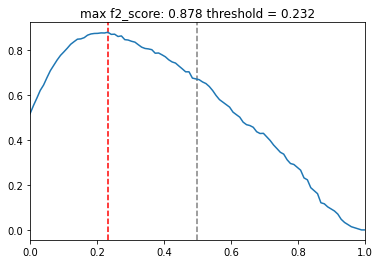

### threshold = 0.232
accuracy: 0.933
f2: 0.878
AUPRC: 0.906
### threshold = 0.500
accuracy: 0.932
f2: 0.671
AUPRC: 0.906


In [ ]:
clf_diagnostic(modelo4, X_val_transformed, y_val) 

In [ ]:
y_val_pred_proba = modelo4.predict_proba(X_val_transformed)[:, 1]
y_val_pred = y_val_pred_proba > 0.232

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
p=tp / (tp + fp)
r=tp / (tp + fn)
print(f"precision = {tp / (tp + fp):.4f}")
print(f"recall = {tp / (tp + fn):.4f}")
print(f"f1 = {2*((p*r)/ (p+r)):.4f}")

precision = 0.7319
recall = 0.9240
f1 = 0.8168


In [ ]:
print(classification_report(y_val, y_val_pred, labels=gridsearch4.classes_))

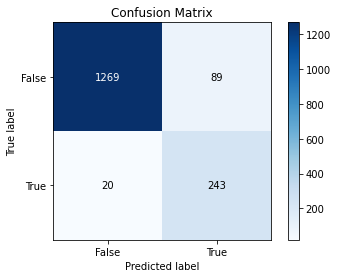

In [ ]:
plot_confusion_matrix(y_val, y_val_pred, normalize=False)

In [ ]:
print(f"AUPRC: {average_precision_score(y_val, y_val_pred_proba):.3f}")

AUPRC: 0.906


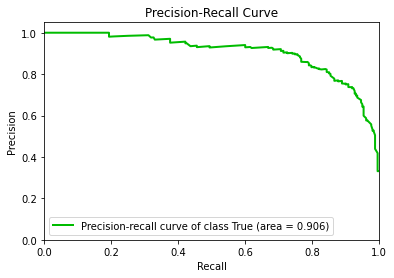

In [ ]:
y_pred_ = modelo4.predict_proba(X_val_transformed)
plot_precision_recall(y_val, y_pred_, classes_to_plot=[1], plot_micro=False,)
plt.show()

los "EXT__" los agregue a los parametros cuando debia hacer los feature importance y agregaba el modelo al pipeline

#RF CLASSIFIER

In [ ]:
param_grid ={ 
    #"class_weight":["balanced"],
    "RFC__criterion":['gini', 'entropy'],
    "RFC__max_depth":[2, 5, 9],
    "RFC__max_features":['log2', 'sqrt'],
    "RFC__n_estimators":[200, 500]  
    
}
#RFC__

In [ ]:
class2=RandomForestClassifier(class_weight="balanced",oob_score=True)

In [ ]:
gridsearch2=GridSearchCV(class2,param_grid)

In [ ]:
class2.get_params().keys()

In [ ]:
gridsearch2.get_params().keys()

In [ ]:
gridsearch2.fit(X_train_transformed,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 9],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [200, 500]})

In [ ]:
gridsearch2.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 500}

In [ ]:
modelo2 = RandomForestClassifier(n_estimators=500, max_features="log2", oob_score=True,criterion="entropy",max_depth=9,class_weight="balanced")

In [ ]:
_=modelo2.fit(X_train_transformed,y_train)

In [ ]:
X_val["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
X_val_transformed = pipe.transform(X_val)

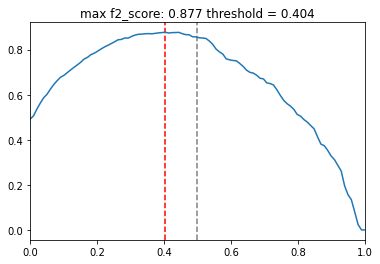

### threshold = 0.404
accuracy: 0.932
f2: 0.877
AUPRC: 0.909
### threshold = 0.500
accuracy: 0.948
f2: 0.855
AUPRC: 0.909


In [ ]:
clf_diagnostic(modelo2, X_val_transformed, y_val) 

In [ ]:
y_val_pred_proba = modelo2.predict_proba(X_val_transformed)[:, 1]
y_val_pred = y_val_pred_proba > 0.404

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
p=tp / (tp + fp)
r=tp / (tp + fn)
print(f"precision = {tp / (tp + fp):.4f}")
print(f"recall = {tp / (tp + fn):.4f}")
print(f"f1 = {2*((p*r)/ (p+r)):.4f}")

precision = 0.7297
recall = 0.9240
f1 = 0.8154


In [ ]:
print(classification_report(y_val, y_val_pred, labels=gridsearch2.classes_))

              precision    recall  f1-score   support

       False       0.98      0.93      0.96      1358
        True       0.73      0.92      0.82       263

    accuracy                           0.93      1621
   macro avg       0.86      0.93      0.89      1621
weighted avg       0.94      0.93      0.94      1621



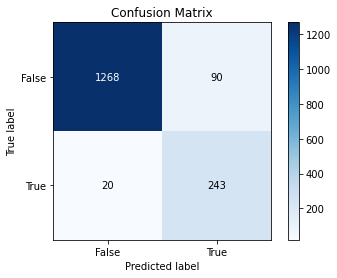

In [ ]:
plot_confusion_matrix(y_val, y_val_pred, normalize=False)

In [ ]:
print(f"AUPRC: {average_precision_score(y_val, y_val_pred_proba):.3f}")

AUPRC: 0.909


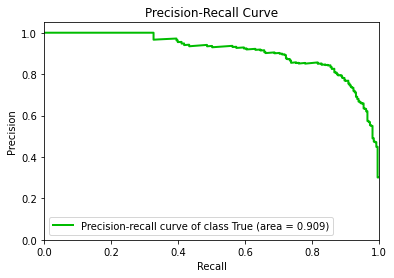

In [ ]:
y_pred_ = modelo2.predict_proba(X_val_transformed)
plot_precision_recall(y_val, y_pred_, classes_to_plot=[1], plot_micro=False,)
plt.show()

In [ ]:
results = []
for params in tqdm(ParameterGrid(param_grid)):
    pipe_ = clone(pipe) # NOTE para no ir pisando pipe original
    _ = pipe_.set_params(**params)
    _ = pipe_.fit(X, y)
    # NOTE only way to get oob predictions:
    y_pred = pipe_.named_steps['RFC'].oob_decision_function_[:, 1] 
    AUPRC = average_precision_score(y, y_pred)
    results.append({'params': params, 'AUPRC': AUPRC})



100%|██████████| 24/24 [01:05<00:00,  2.73s/it]


In [ ]:
df_results = pd.DataFrame(results)
df_results = pd.concat( 
    [df_results, pd.json_normalize(df_results['params'])], axis=1)
ordenados=df_results.sort_values("AUPRC", ascending=False)
ordenados


,params,AUPRC,RFC__criterion,RFC__max_depth,RFC__max_features,RFC__n_estimators
22,"{'RFC__criterion': 'entropy', 'RFC__max_depth'...",0.9204,entropy,9,sqrt,200
21,"{'RFC__criterion': 'entropy', 'RFC__max_depth'...",0.9189,entropy,9,log2,500
23,"{'RFC__criterion': 'entropy', 'RFC__max_depth'...",0.9172,entropy,9,sqrt,500
11,"{'RFC__criterion': 'gini', 'RFC__max_depth': 9...",0.9168,gini,9,sqrt,500
9,"{'RFC__criterion': 'gini', 'RFC__max_depth': 9...",0.9164,gini,9,log2,500
20,"{'RFC__criterion': 'entropy', 'RFC__max_depth'...",0.9162,entropy,9,log2,200
10,"{'RFC__criterion': 'gini', 'RFC__max_depth': 9...",0.9127,gini,9,sqrt,200
8,"{'RFC__criterion': 'gini', 'RFC__max_depth': 9...",0.9124,gini,9,log2,200
19,"{'RFC__criterion': 'entropy', 'RFC__max_depth'...",0.8449,entropy,5,sqrt,500
5,"{'RFC__criterion': 'gini', 'RFC__max_depth': 5...",0.8434,gini,5,log2,500


In [ ]:
best_params = df_results.loc[df_results["AUPRC"].idxmax()]["params"]
best_pipe = clone(pipe)
_ = best_pipe.set_params(**best_params)
_ = best_pipe.fit(X, y)

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# feature importance
importances = best_pipe.named_steps['RFC'].feature_importances_
feature_names = best_pipe[-2].get_feature_names_out() 
df_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
df_importance.sort_values("importance", ascending=False)
#df_importance.astype(str)


,feature,importance
15,Total_Trans_Amt,0.2150
16,Total_Trans_Ct,0.2088
12,Total_Revolving_Bal,0.1027
17,Total_Ct_Chng_Q4_Q1,0.1010
18,Avg_Utilization_Ratio,0.0676
14,Total_Amt_Chng_Q4_Q1,0.0603
8,Total_Relationship_Count,0.0457
13,Avg_Open_To_Buy,0.0302
11,Credit_Limit,0.0295
9,Months_Inactive_12_mon,0.0294


In [ ]:
outliers=["Total_Trans_Amt","Contacts_Count_12_mon","Total_Amt_Chng_Q4_Q1"]

In [ ]:
#cachedir = mkdtemp()
pipe3 = Pipeline([
    ("0", DropFeatures(features_to_drop=["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])), 
    ("1", RandomSampleImputer(variables=Unknown, random_state=None, seed='general', seeding_method='add')),
    ("2", RareLabelEncoder(tol=50 / X.shape[0], n_categories=1, replace_with="Rare", variables=categorical_features2)),
    ("3", OrdinalEncoder(encoding_method='ordered', variables=categorical_features2)),
    ("4", Winsorizer(capping_method='gaussian', tail='right', fold=3, add_indicators=True, variables=outliers, missing_values='ignore')),
   #('RFC', RandomForestClassifier(n_estimators=200, max_features="sqrt", oob_score=True,criterion="entropy",max_depth=9,class_weight="balanced"))
   #("LGBM",LGBMClassifier(is_unbalance=True, objective= "binary",max_depth=5,min_child_samples= 5, num_leaves=5))
],
 #memory=cachedir
)

In [ ]:
X_train["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_train["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_train["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
_=pipe3.fit(X_train, y_train)
X_train_transformed = pipe3.transform(X_train)

In [ ]:
modelo2 = RandomForestClassifier(n_estimators=200, max_features="log2", oob_score=True,criterion="entropy",max_depth=9,class_weight="balanced")

In [ ]:
_=modelo2.fit(X_train_transformed,y_train)

In [ ]:
X_val["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
X_val["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
X_val_transformed = pipe3.transform(X_val)

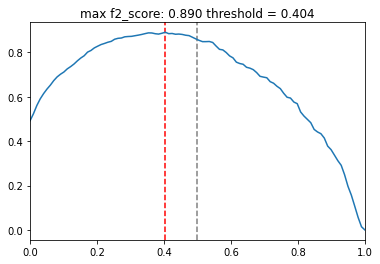

### threshold = 0.404
accuracy: 0.940
f2: 0.890
AUPRC: 0.922
### threshold = 0.500
accuracy: 0.952
f2: 0.859
AUPRC: 0.922


In [ ]:
clf_diagnostic(modelo2, X_val_transformed, y_val) 

In [ ]:
y_val_pred_proba = modelo2.predict_proba(X_val_transformed)[:, 1]
y_val_pred = y_val_pred_proba > 0.404

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
p=tp / (tp + fp)
r=tp / (tp + fn)
print(f"precision = {tp / (tp + fp):.4f}")
print(f"recall = {tp / (tp + fn):.4f}")
print(f"f1 = {2*((p*r)/ (p+r)):.4f}")

precision = 0.7562
recall = 0.9316
f1 = 0.8348


In [ ]:
print(classification_report(y_val, y_val_pred, labels=gridsearch2.classes_))

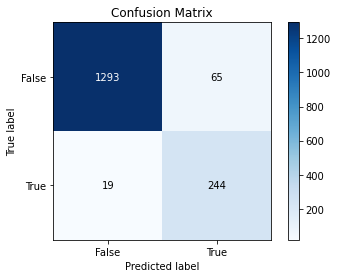

In [ ]:
plot_confusion_matrix(y_val, y_val_pred, normalize=False)

In [ ]:
print(f"AUPRC: {average_precision_score(y_val, y_val_pred_proba):.3f}")

AUPRC: 0.922


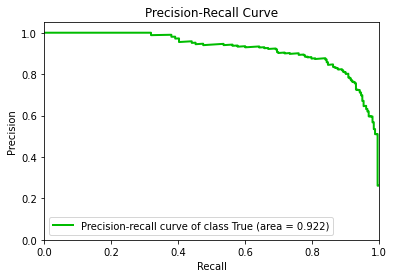

In [ ]:
y_pred_ = modelo2.predict_proba(X_val_transformed)
plot_precision_recall(y_val, y_pred_, classes_to_plot=[1], plot_micro=False,)
plt.show()

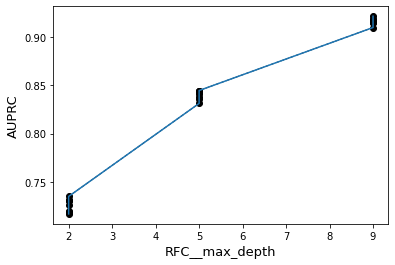

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(
    ordenados['RFC__max_depth'], ordenados['AUPRC'],
    marker='o', linestyle='--', linewidth=1, color='black')
ax.errorbar(
    ordenados['RFC__max_depth'], ordenados['AUPRC'],
)
plt.xlabel('RFC__max_depth', fontsize=13)
plt.ylabel('AUPRC', fontsize=13)
plt.show()

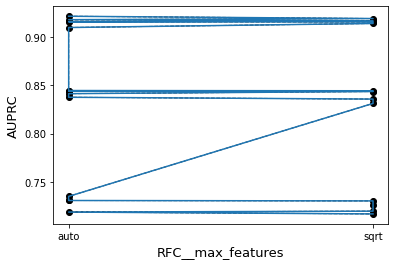

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(
    ordenados['RFC__max_features'], ordenados['AUPRC'],
    marker='o', linestyle='--', linewidth=1, color='black')
ax.errorbar(
    ordenados['RFC__max_features'], ordenados['AUPRC'],
)
plt.xlabel('RFC__max_features', fontsize=13)
plt.ylabel('AUPRC', fontsize=13)
plt.show()

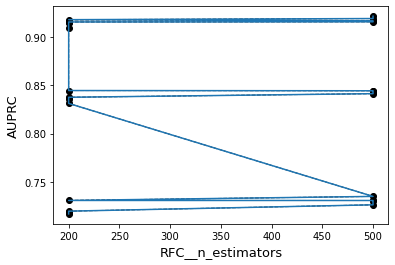

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(
    ordenados['RFC__n_estimators'], ordenados['AUPRC'],
    marker='o', linestyle='--', linewidth=1, color='black')
ax.errorbar(
    ordenados['RFC__n_estimators'], ordenados['AUPRC'],
)
plt.xlabel('RFC__n_estimators', fontsize=13)
plt.ylabel('AUPRC', fontsize=13)
plt.show()

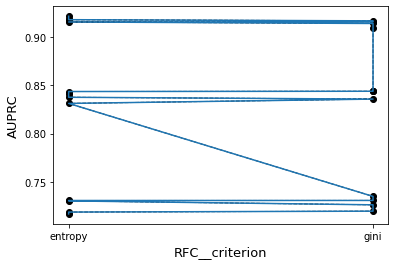

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(
    ordenados['RFC__criterion'], ordenados['AUPRC'],
    marker='o', linestyle='--', linewidth=1, color='black')
ax.errorbar(
    ordenados['RFC__criterion'], ordenados['AUPRC'],
)
plt.xlabel('RFC__criterion', fontsize=13)
plt.ylabel('AUPRC', fontsize=13)
plt.show()

#PREDICCIÒN FINAL

In [ ]:
dfvalores=pd.DataFrame(
    {"y_val": y_val,"y_val_pred":y_val_pred}
)
dfvalores.head()

Validamos con el test (0.2 restante de la base original)

In [ ]:
testeo=pd.read_csv("data_test.csv", sep=",",index_col=0)
Xtest = testeo.drop(["Attrition_Flag"], axis=1)
ytest = testeo["Attrition_Flag"]

In [ ]:
Xtest.columns

In [ ]:
X_train.columns

In [ ]:
Xtest["Education_Level"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
Xtest["Marital_Status"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)
Xtest["Income_Category"].replace(to_replace = "Unknown", value = np.NaN, inplace=True)

In [ ]:
Xtest_transformed= pipe.transform(Xtest)

In [ ]:
modelo1=LGBMClassifier(is_unbalance=True, objective= "binary",max_depth=5,min_child_samples= 5, num_leaves=5)

In [ ]:
y_predstest=modelo1.predict(Xtest_transformed) #MODELO.PREDICT PERO SIN CREO Q EL PUNTO DE CORTE

In [ ]:
salida = pd.DataFrame(data={"Attrition_Flag": y_predstest}).astype(str)
salida.index = testeo.CLIENTNUM
salida.to_csv("prediccion.csv", sep=',',index=True,  index_label='CLIENTNUM')

In [ ]:
Xtest.columns

In [ ]:
testeo.groupby(["Total_Revolving_Bal", "Attrition_Flag"]).size()

In [ ]:
testeo.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
9616,751155783,Existing Customer,47,F,2,High School,Married,$40K - $60K,Blue,40,2,1,3,4074.0000,1868,2206.0000,0.6880,15005,118,0.7610,0.4590,0.0001,0.9999
7865,714998508,Existing Customer,53,M,3,Uneducated,Married,$120K +,Blue,36,2,2,0,3742.0000,1454,2288.0000,0.8940,5326,62,0.6760,0.3890,0.0000,1.0000
73,820582308,Existing Customer,42,M,5,Uneducated,Married,$80K - $120K,Blue,37,6,2,2,22913.0000,1528,21385.0000,0.4140,1394,35,0.5220,0.0670,0.0001,0.9999
596,720370533,Attrited Customer,55,M,3,Uneducated,Married,$60K - $80K,Blue,44,3,2,2,2323.0000,0,2323.0000,0.7370,804,15,0.5000,0.0000,0.9918,0.0082
114,711844758,Existing Customer,48,M,3,Graduate,Single,$80K - $120K,Blue,35,6,1,0,13551.0000,1294,12257.0000,0.7910,1388,37,1.0560,0.0950,0.0000,1.0000


In [ ]:
salida.head(5)

,Attrition_Flag
CLIENTNUM,
751155783,False
714998508,False
820582308,False
720370533,True
711844758,False
